<a href="https://colab.research.google.com/github/wmduggan41/deep-learning/blob/master/duggan_william_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Note to grader:** Each question consists of parts, e.g. Q1(i), Q1(ii), etc. Each part must be first graded  on a 0-4 scale, following the standard NJIT convention (A:4, B+: 3.5, B:3, C+: 2.5, C: 2, D:1, F:0). However, any given item may be worth 4 or 8 points; if an item is worth 8 points, you need to accordingly scale the 0-4 grade.


The total score must be re-scaled to 100. That should apply to all future assignments so that Canvas assigns the same weight on all assignments. 



# Assignment 1



## Preparation Steps

In [ ]:
# install boto3 and call for audio files
!pip install boto3 
# from google.colab import drive
# drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import all necessary python packages

import os
import torch
import torchaudio
import numpy as np
import pandas as pd
import sklearn
import torch
import torch.optim as optim
import torch.nn as nn
import time
import io
import os
import tarfile
import tempfile
import matplotlib.pyplot as plt
import requests
import boto3
import pandas as pd
import numpy as np
import warnings
import re
import random
from collections import Counter
from tqdm import tqdm

from IPython.display import Audio
from dataclasses import dataclass
from botocore import UNSIGNED
from botocore.config import Config
from IPython.display import Audio
from torchaudio.utils import download_asset
from skimage import io, transform
from torch.utils.data import Dataset, DataLoader


SAMPLE_GSM = download_asset("tutorial-assets/steam-train-whistle-daniel_simon.gsm")
SAMPLE_WAV = download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav")
SAMPLE_WAV_8000 = download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042-8000hz.wav")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
metadata = torchaudio.info(SAMPLE_WAV)


print("============================================================")
print(device)
print("============================================================")
print(metadata)
print("============================================================")
print(torchaudio.__version__)

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


cpu
AudioMetaData(sample_rate=16000, num_frames=54400, num_channels=1, bits_per_sample=16, encoding=PCM_S)
0.12.1+cu113


## <font color = 'blue'> Question 1. Basic Operations with Tensors </font>

Your task for this question is to follow the NumPy  [**tutorial**](https://jalammar.github.io/visual-numpy/?fbclid=IwAR0tSntx5mj1aHteokRKrT4G6z77M3z0Quj40AQZ9mvKlhs2RTN3xXrc6Eo) and 'mirror' each of the operations presented in the tutorial with tensors in PyTorch. 

You may find useful to consult this PyTorch introductory [tutorial](https://jhui.github.io/2018/02/09/PyTorch-Basic-operations/), and as always the full PyTorch [documentation](https://pytorch.org/docs/stable/torch.html) is the ultimate resource.

*(Please insert cells below for your answers )*

In [ ]:
# Creating array
x = torch.Tensor([1, 2, 3])

print("This is an array in PyTorch:")
print("===========================")
x

This is an array in PyTorch:


tensor([1., 2., 3.])

In [ ]:
# Creating ones, zeros and random arrays
a = torch.ones(3)
b = torch.zeros(3)
c = torch.rand(3)

print("This is an array of ones using Pytorch:")
print(a)
print("==========================================")
print("This is an array of zeros using Pytorch:")
print(b)
print("===========================================")
print("This is an array of random values between 0 nd 1 using Pytorch:")
print(c)

This is an array of ones using Pytorch:
tensor([1., 1., 1.])
This is an array of zeros using Pytorch:
tensor([0., 0., 0.])
This is an array of random values between 0 nd 1 using Pytorch:
tensor([0.0787, 0.4277, 0.9386])


In [ ]:
# Array arithmetic
x = torch.tensor([1, 2, 3, 4])
y = torch.tensor([2, 2, 2, 2])

print("Adding array x and y:\n") 
print(x + y)
print("============================") 
print("Subrtacting array x and y:\n")
print(x - y)
print("============================")
print("Multiplying array x and y:\n") 
print(x * y)
print("============================")
print("Dividing array x and y:\n")
print(x / y)
print("============================")
print("Power of array x and y:\n")
print(x ** y)

Adding array x and y:

tensor([3, 4, 5, 6])
Subrtacting array x and y:

tensor([-1,  0,  1,  2])
Multiplying array x and y:

tensor([2, 4, 6, 8])
Dividing array x and y:

tensor([0.5000, 1.0000, 1.5000, 2.0000])
Power of array x and y:

tensor([ 1,  4,  9, 16])


In [ ]:
# Indexing from previous x array 1,2,3,4
x1 = x[-1] 
x2 = x[1:3]

print("Selecting first element in original array x:\n")
print(x1)
print("============================================================")
print("Selecting second and third elements in original array:\n")
print(x2)

Selecting first element in original array x:

tensor(4)
Selecting second and third elements in original array:

tensor([2, 3])


In [ ]:
# Aggregating array 1,2,3,4
print("Max elemental value of original array x:\n")
print(torch.max(x))
print("========================================================")
print("Min elemantal value of original array x:\n") 
print(torch.min(x))
print("========================================================")
print("Sum of original array x:\n")
print(torch.sum(x))

Max elemental value of original array x:

tensor(4)
Min elemantal value of original array x:

tensor(1)
Sum of original array x:

tensor(10)


In [ ]:
# Creating matrices and filling values
p3 = torch.eye(3)

m = torch.ones(10)  
m = torch.ones_like(p3)

m = torch.ones(3,3)
m[1].fill_(2)
m[2].fill_(3)

print("Changing values of each element in a new 3x3 array:\n")
print(m)
print("=====================================================")

Changing values of each element in a new 3x3 array:

tensor([[1., 1., 1.],
        [2., 2., 2.],
        [3., 3., 3.]])


In [ ]:
# Creating matrices 2x3 of ones
o = torch.ones(3,2)

print("Creating a matrix of ones:\n")
print(o)
print("=============================")

Creating a matrix of ones:

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])


In [ ]:
# Creating matrices 3x2 of zeros
z = torch.zeros(3,2)

print("Creating a matrix of zeros:\n")
print(z)
print("=============================")

Creating a matrix of zeros:

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])


In [ ]:
# Creating matrices 3x2 of random values between 0 and 1
r = torch.rand(3,2)

print("Creating 3x2 matrix of random values between o and 1:\n")
print(r)
print("===================================")

Creating 3x2 matrix of random values between o and 1:

tensor([[0.4234, 0.7434],
        [0.3075, 0.6232],
        [0.7658, 0.6024]])


In [ ]:
# Matrix Arithmetic and Broadcasting
data = torch.tensor([1,2,3,4]).reshape((2,2))
one = torch.ones_like(data).reshape((2,2)) 
print("Arange 1 through 4 and resehape 2x2:\n")
print(data)
print("================================================")
print("Arange and resehape 2x2 of ones:\n")
print(one)
print("================================")
print("Adding both matrices together:\n")
print(data + one)
print("================================")

Arange 1 through 4 and resehape 2x2:

tensor([[1, 2],
        [3, 4]])
Arange and resehape 2x2 of ones:

tensor([[1, 1],
        [1, 1]])
Adding both matrices together:

tensor([[2, 3],
        [4, 5]])


In [ ]:
# Dot Product (taking 1x3 to the power of 10's)
d1 = torch.sum(torch.tensor([1*1,2*100,3*10000]))
d2 = torch.sum(torch.tensor([1*10,1000*2,100000*3]))

print("Vectorizing (1,2,3) x (Powers of 10):\n")
print(d1,d2)
print("=======================================================================")

Vectorizing (1,2,3) x (Powers of 10):

tensor(30201) tensor(302010)


In [ ]:
# Matrix indexing 
data1 = torch.tensor(([1,2],[3,4],[5,6]))

print("This is a 3x2 array:\n")
print(data1)
print("======================")
print("Selecting 1st row 2nd column value in array:\n")
print(data1[0,1])
print("==============================================")
print("Selecting rows 1 through 3 in array:\n")
print(data1[1:3])
print("=========================================================")
print("Selecting first and second values of column 1 in array:\n")
print(data1[0:2,0])
print("==================")

This is a 3x2 array:

tensor([[1, 2],
        [3, 4],
        [5, 6]])
Selecting 1st row 2nd column value in array:

tensor(2)
Selecting rows 1 through 3 in array:

tensor([[3, 4],
        [5, 6]])
Selecting first and second values of column 1 in array:

tensor([1, 3])


In [ ]:
# Matrix Aggregation  
dd = torch.tensor([1., 2., 3., 4., 5., 6.]).reshape(3,2)
ee = torch.tensor([1., 2., 5., 3., 4., 6.]).reshape(3,2)

print("Matrix 1 created:\n")
print(dd)
print("=================")
print("Matrix 2 created:\n")
print(ee)
print("===================")
print("Selecting matrix 1 max value:\n")
print(dd.max())
print("===============================")
print("Selecting matrix 1 min value:\n")
print(dd.min())
print("===============================")
print("Sum of matrix 1 values:\n")
print(dd.sum())
print("=========================")
print("Max values accross matrix 2 columns:\n")
print(ee.max(axis=0))
print("======================================")
print("Max values accross matrix 2 rows:\n")
print(ee.max(axis=1))
print("===================================")

Matrix 1 created:

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
Matrix 2 created:

tensor([[1., 2.],
        [5., 3.],
        [4., 6.]])
Selecting matrix 1 max value:

tensor(6.)
Selecting matrix 1 min value:

tensor(1.)
Sum of matrix 1 values:

tensor(21.)
Max values accross matrix 2 columns:

torch.return_types.max(
values=tensor([5., 6.]),
indices=tensor([1, 2]))
Max values accross matrix 2 rows:

torch.return_types.max(
values=tensor([2., 5., 6.]),
indices=tensor([1, 0, 1]))


In [ ]:
# Transposing and Reshaping
de = dd

print("Original:\n")
print(de)
print("===================")
print("Transposed:\n")
print(de.T)
print("===================")
print("Reshaping 6x1:\n")
print(de.reshape(6,1))
print("===================")
print("Reshaping 2x3:\n")
print(de.reshape(2,3))
print("===================")
print("Reshaping 3x2:\n")
print(de.reshape(3,2))

Original:

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
Transposed:

tensor([[1., 3., 5.],
        [2., 4., 6.]])
Reshaping 6x1:

tensor([[1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.]])
Reshaping 2x3:

tensor([[1., 2., 3.],
        [4., 5., 6.]])
Reshaping 3x2:

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])


In [ ]:
# Yet More Dimensions
ymd = torch.ones((4,3,2))

print("3-dimensional array of ones:\n")
print(ymd)
print("==============================")

3-dimensional array of ones:

tensor([[[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]]])


In [ ]:
# Practical usage example MSE
ypred = torch.ones(3)
ylabel = torch.tensor([1.,2.,3.])

error = (1/3) * torch.sum(torch.square(ypred - ylabel))

print("MSE of ypred and ylabel (1/3 * 5):\n")
print(error)
print("==================================")

MSE of ypred and ylabel (1/3 * 5):

tensor(1.6667)


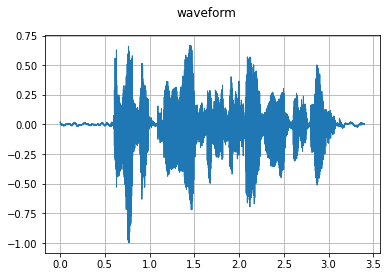

In [ ]:
# Data Representation 
# An audio file example from source:
#("https://pytorch.org/audio/main/tutorials/audio_io_tutorial.html")

waveform, sample_rate = torchaudio.load(SAMPLE_WAV)

def plot_waveform(waveform, sample_rate):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle("waveform")
    plt.show(block=False)

plot_waveform(waveform, sample_rate)

In [ ]:
# Slicing an audio file to select the first second of audio using Numpy in PyTorch
print("Here's a look at a slice of an audio file:\n")
print("============================================")
waveform[:44100]

Here's a look at a slice of an audio file:



tensor([[0.0183, 0.0180, 0.0180,  ..., 0.0018, 0.0019, 0.0032]])

In [ ]:
# Saving audio file 

def inspect_file(path):
    print("-" * 10)
    print("Source:", path)
    print("-" * 10)
    print(f" - File size: {os.path.getsize(path)} bytes")
    print(f" - {torchaudio.info(path)}")
    print()

with tempfile.TemporaryDirectory() as tempdir:
    path = f"{tempdir}/save_example_default.wav"
    torchaudio.save(path, waveform, sample_rate)
    inspect_file(path)

----------
Source: /tmp/tmpnk654t_o/save_example_default.wav
----------
 - File size: 217658 bytes
 - AudioMetaData(sample_rate=16000, num_frames=54400, num_channels=1, bits_per_sample=32, encoding=PCM_F)



In [ ]:
# Image loading, dataloaders, dataset laoders
from __future__ import print_function, division
from skimage import io, transform
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

In [ ]:
# Download the dataset from (https://download.pytorch.org/tutorial/faces.zip) so that the images are in your root directory. 
# I added a personal image of my daughter name "ISLA.jpg" 
# The tutorial dataset was actually generated by applying excellent dlib’s pose estimation on a few images from imagenet tagged as ‘face’.

landmarks_frame = pd.read_csv('face_landmarks.csv')

n = 69
img_name = landmarks_frame.iloc[n, 0]
landmarks = landmarks_frame.iloc[n, 1:]
landmarks = np.asarray(landmarks)
landmarks = landmarks.astype('float').reshape(-1, 2)

print('Image name: {}'.format(img_name))
print('Landmarks shape: {}'.format(landmarks.shape))
print('First 4 Landmarks: {}'.format(landmarks[:4]))
print("===========================================")

Image name: ISLA.jpg
Landmarks shape: (68, 2)
First 4 Landmarks: [[ 42. 109.]
 [ 40. 122.]
 [ 41. 135.]
 [ 42. 148.]]


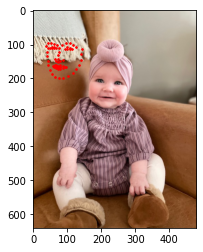

Isla Duggan at 6 months :)


In [ ]:
def show_landmarks(image, landmarks):
    """Show image with landmarks"""
    plt.imshow(image)
    plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='.', c='r')
    plt.pause(0.001)  # pause a bit so that plots are updated

plt.figure()
show_landmarks(io.imread(os.path.join('', img_name)),
               landmarks)
plt.show()
print("====================================")
print("Isla Duggan at 6 months :)")

In [ ]:
# Following tutorial: Let’s create a dataset class for our face landmarks dataset. 
# We will read the csv in __init__ but leave the reading of images to __getitem__. 
# This is memory efficient because all the images are not stored in the memory at once but read as required.

class FaceLandmarksDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.landmarks_frame.iloc[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.iloc[idx, 1:]
        landmarks = np.array([landmarks])
        landmarks = landmarks.astype('float').reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample

0 (324, 215, 3) (68, 2)


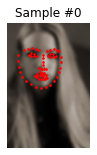

1 (500, 333, 3) (68, 2)


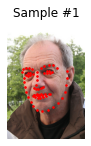

2 (250, 258, 3) (68, 2)


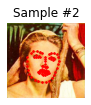

3 (434, 290, 3) (68, 2)


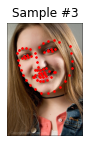

In [ ]:
# Instantiating this class and iterate through the data samples. 
# We will print the sizes of first 4 samples and show their landmarks.

face_dataset = FaceLandmarksDataset(csv_file='face_landmarks.csv',
                                    root_dir='')

fig = plt.figure()

for i in range(len(face_dataset)):
    sample = face_dataset[i]

    print(i, sample['image'].shape, sample['landmarks'].shape)

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_landmarks(**sample)

    if i == 3:
        plt.show()
        break

In [ ]:
# One issue we can see from the above is that the samples are not of the same size. 
# Most neural networks expect the images of a fixed size. Therefore, we will need to write some preprocessing code.

class Rescale(object):
    """Rescale the image in a sample to a given size.

    Args:
        output_size (tuple or int): Desired output size. If tuple, output is
            matched to output_size. If int, smaller of image edges is matched
            to output_size keeping aspect ratio the same.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size

        new_h, new_w = int(new_h), int(new_w)

        img = transform.resize(image, (new_h, new_w))

        # h and w are swapped for landmarks because for images,
        # x and y axes are axis 1 and 0 respectively
        landmarks = landmarks * [new_w / w, new_h / h]

        return {'image': img, 'landmarks': landmarks}


class RandomCrop(object):
    """Crop randomly the image in a sample.

    Args:
        output_size (tuple or int): Desired output size. If int, square crop
            is made.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        if isinstance(output_size, int):
            self.output_size = (output_size, output_size)
        else:
            assert len(output_size) == 2
            self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        new_h, new_w = self.output_size

        top = np.random.randint(0, h - new_h)
        left = np.random.randint(0, w - new_w)

        image = image[top: top + new_h,
                      left: left + new_w]

        landmarks = landmarks - [left, top]

        return {'image': image, 'landmarks': landmarks}


class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        # swap color axis because
        # numpy image: H x W x C
        # torch image: C x H x W
        image = image.transpose((2, 0, 1))
        return {'image': torch.from_numpy(image),
                'landmarks': torch.from_numpy(landmarks)}

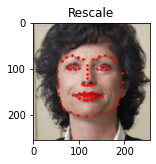

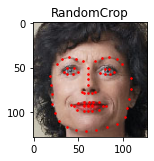

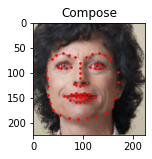

In [ ]:
# Compose transofrmations

scale = Rescale(256)
crop = RandomCrop(128)
composed = transforms.Compose([Rescale(256),
                               RandomCrop(224)])

# Apply each of the above transforms on sample.
fig = plt.figure()
sample = face_dataset[65]
for i, tsfrm in enumerate([scale, crop, composed]):
    transformed_sample = tsfrm(sample)

    ax = plt.subplot(1, 3, i + 1)
    plt.tight_layout()
    ax.set_title(type(tsfrm).__name__)
    show_landmarks(**transformed_sample)

plt.show()

In [ ]:
# Iterate through dataset. Remeber to include root directory file to call object

transformed_dataset = FaceLandmarksDataset(csv_file='face_landmarks.csv',
                                           root_dir='',
                                           transform=transforms.Compose([
                                               Rescale(256),
                                               RandomCrop(224),
                                               ToTensor()
                                           ]))

for i in range(len(transformed_dataset)):
    sample = transformed_dataset[i]

    print(i, sample['image'].size(), sample['landmarks'].size())

    if i == 3:
        break

0 torch.Size([3, 224, 224]) torch.Size([68, 2])
1 torch.Size([3, 224, 224]) torch.Size([68, 2])
2 torch.Size([3, 224, 224]) torch.Size([68, 2])
3 torch.Size([3, 224, 224]) torch.Size([68, 2])


0 torch.Size([4, 3, 224, 224]) torch.Size([4, 68, 2])
1 torch.Size([4, 3, 224, 224]) torch.Size([4, 68, 2])
2 torch.Size([4, 3, 224, 224]) torch.Size([4, 68, 2])
3 torch.Size([4, 3, 224, 224]) torch.Size([4, 68, 2])


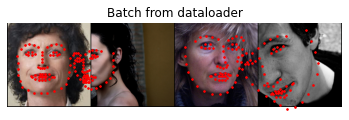

In [ ]:
# torch.utils.DataLoader is an iterator that provides bacthing, shuffling and loading in parallel using multiprocessing workers.

dataloader = DataLoader(transformed_dataset, batch_size=4,
                        shuffle=True, num_workers=0)


# Helper function to show a batch
def show_landmarks_batch(sample_batched):
    """Show image with landmarks for a batch of samples."""
    images_batch, landmarks_batch = \
            sample_batched['image'], sample_batched['landmarks']
    batch_size = len(images_batch)
    im_size = images_batch.size(2)
    grid_border_size = 2

    grid = utils.make_grid(images_batch)
    plt.imshow(grid.numpy().transpose((1, 2, 0)))

    for i in range(batch_size):
        plt.scatter(landmarks_batch[i, :, 0].numpy() + i * im_size + (i + 1) * grid_border_size,
                    landmarks_batch[i, :, 1].numpy() + grid_border_size,
                    s=10, marker='.', c='r')

        plt.title('Batch from dataloader')

# if you are using Windows, uncomment the next line and indent the for loop.
# you might need to go back and change "num_workers" to 0.

if __name__ == '__main__':
  for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch, sample_batched['image'].size(),
          sample_batched['landmarks'].size())

    # observe 4th batch and stop.
    if i_batch == 3:
        plt.figure()
        show_landmarks_batch(sample_batched)
        plt.axis('off')
        plt.ioff()
        plt.show()
        break

In [ ]:
# Language using word2vec. Importing libraries and copied text from source below
raw_text = """ HAVE the bards who preceded me left any theme unsung? What, therefore, shall be my subject? Love only must supply my lay. Dost thou then recollect, after long consideration, the mansion of thy beloved? bower of Abla, in the valley of Jiwaa, give me tidings of my love! O bower of Abla, may the morning rise on thee with prosperity and health! There I stopped my camel, large as a tower, the anguish of my passion having delayed the accomplishment of my bold enterprise, Whilst Abla was dwelling in Jiwaa, and our tribe were stationed in Hazn, and Samaan, and Motathallem. Hail, dear ruins! with whose possessors I had old engagements; more dreary and more desolate are you become, after the departure of my beloved Omm Alheitham! She dwells in the land of my foes, like roaring lions: oh, how painful has been my search after thee, fair daughter of Makhrem! I felt myself attached to her at our first interview, although I had slain her countrymen in battle: I assure thee, by the life of thy father, that of my attachment there can be no doubt. Thou hast possessed thyself of my heart; thou hast fixed thy abode in it (imagine not that I delude thee), and art settled there as a beloved and cherished inhabitant. Yet how can I visit my fair one, whilst her family have their vernal mansion in Oneizatain, and mine are stationed in Ghailem? Surely thou hast firmly resolved to depart from me, since the camels of thy tribe are bridled even in so dark a night. Nothing so much alarms me with a signal of her destined removal as my seeing the camels of burden, which belong to her tribe, grazing on khimkhim-berries in the midst of their tents: Among them are forty-two milch-camels, dark as the plumes of a coal-black raven. Then, Antara, she pierced thee to the heart with her well-pointed teeth exquisitely white, the kiss of which is delicious, and the taste ravishingly sweet! From the mouth of this lovely damsel, when you kiss her lips, proceeds the fragrance of musk, as from the vase of a perfumer; Or like the scent of a blooming bower, whose plants the gentle rains have kept in continual verdure, which no filth has sullied, and to which there has been no resort: Every morning-cloud, clear of hail, has drenched it with a plentiful shower, and has left all the little cavities in the earth both round and bright as coins of silver: Profusely and copiously it descends; and every evening the stream, which nothing intercepts, gushes rapidly through it. The flies remain in it with incessant buzzing, and their murmurs are like the song of a man exhilarated with wine: Their sound, when they strike their slender legs against each other, is like the sound of a flint, from which the sparks are forced by a man with one arm, intent upon his labour. While thou, fair Abla, reclinest both evening and morning on the lap of a soft couch, I pāss whole nights on the back of a dark-coloured horse well caparisoned: My only cushion is the saddle of a charger with firm thick feet, strong-sided, and large in the place of his girths. Shall a camel of Shaden bear me to thy tent, a camel, far removed from her country, destitute of milk, and separated from the herd? She waves her tail in her playful mood, and proudly moves her body from side to side, even at the end of her nightly excursion: she strikes the hills with her quickly-moving and firmly-trampling hoofs. Thus the bird without ears, between whose feet there is but a small space, the swift ostrich beats the ground in his evening course. The young ostriches gather themselves around him, as a multitude of black Yemenian camels assemble round their Abyssinian herdman, who is unable to express himself in the language of Arabia. They follow him, guided by the loftiness of his head, which resembles the carriage of travelling damsels, raised on high, and covered like a tent. His head, though lofty, is small: when he is going to visit the eggs, which his female left in Dhulasheira, he looks like an Ethiop with short ears in a trailing garment of furred hides. My camel drinks the water of Dehradhain, but starts aside with disdain from the hostile rivulets of Dailem. She turns her right side, as if she were in fear of some large-headed screamer of the night, Of a hideous wild-cat fixed to her body, who, as often as she bent herself towards him in her wrath, assailed her with his claws and his teeth. I continue all day on the well-cemented tower of her back, strongly raised, and firm as the pillars of him who pitches a tent. When she rests, she crouches on the soft bank of Ridaa, and groans through fatigue, like the soft sounding reed, which she presses with her weight. Her sweat resembles thick rob or tenacious pitch, which the kindled fire causes to bubble in the sides of a caldron; It gushes from behind her ears, when she boils with rage, exults in her strength, and struts in her pride, like the stallion of her herd, when his rivals assail him. O Abla, although thou droppest thy veil before me, yet know, that by my agility I have made captive many a knight clad in complete armour. Bestow on me the commendation which thou knowest to be due; since my nature is gentle and mild, when my rights are not invaded; But, when I am injured, my resentment is firm, and bitter as coloquinteda to the taste of the aggressor. I quaff; when the noontide heat is abated, old wine, purchased with bright and well-stamped coin; I quaff it in a goblet of yellow glass variegated with white streaks, whose companion is a glittering flagon, well secured by its lid from the blasts of the north: When I drink it, my wealth is dissipated, but my fame remains abundant and unimpaired; And when I return to sobriety, the dew of my liberality continues as fresh as before: give due honour,  herefore, to those qualities which thou knowest me to possess. Many a consort of a fair one, whose beauty required no ornaments, have I left prostrate on the ground; and the life-blood has run sounding from his veins, opened by my javelin, like the mouth of a camel with a divided lip: With a nimble and double-handed stroke, I prevented his attack; and the stream that gushed from the penetrating wound bore the colour of anemones. Go, ask the warriors, O daughter of Malec, if thou art ignorant of my valour, ask them that which thou knowest not; Ask how I act, when I am constantly fixed to the saddle of an elegant horse, swimming in his course, whom my bold antagonists alternately wound; Yet sometimes he advances alone to the conflict, and sometimes he stands collected in a multitudinous throng of heroes with strong bows: Ask, and whoever has been witness to the combat will inform thee that I am impetuous in battle, but regardless of the spoils. Many a warrior, clad in a suit of mail, at whose violent assault the boldest men have trembled, who neither had saved himself by swift flight nor by abject submission, Has this arm laid prone with a rapid blow from a well-straightened javelin, firm between the knots: Broad were the lips of the wound; and the noise of the rushing blood called forth the wolves, prowling in the night, and pinched with hunger: With my swift lance did I pierce his coat of mail; and no warrior, however brave, is secure from its point. I left him, like a sacrificed victim, to the lions of the forest, who feasted on him between the crown of his head and his wrists. Often have I burst the interior folds of a well-wrought habergeon, worn by a famed warrior appointed to maintain his post; Whose hands were brisk in casting lots, when winter demands such recreation: a man censured for his disregard of wealth, and for causing the wine-merchant to strike his flag, by purchasing all his store. When he saw me descend from my steed, and rush towards him, he grinned with horror, but with no smile of joy. My engagement with him lasted the whole day, until his head and fingers, covered with clotted gore, appeared to be stained with the juice of idhlim. Then I fixed him with my lance; I struck him to the heart with an Indian scimitar, the blade of which was of a bright water, and rapid was the stroke it gave: A warrior, whose armour seemed to be braced on a lofty tree; a chief, who, like a king, wore sandals of leather stained with Egyptian thorn: a hero, without an equal. O lovely heifer! what a sweet prey was she to a hunter permitted to chase her! To me she was wholly denied: oh, would to heaven that she had not been forbidden me! I sent forth my handmaid, and said to her: "Go, ask tidings  inquisitively of my beloved, and bring me intelligence." She said: "I have seen the hostile guards negligent of their watch, and the wild heifer may be smitten by any archer who desires to shoot her." Then she turned towards me with the neck of a young roe, well grown, of an exquisite breed among the gazals of the wood: a roe with a milk-white face. I have been informed of a man ungrateful for my kindness; but ingratitude turns the mind of a benefactor from any more beneficence. The instructions which my valiant uncle gave me I have diligently observed; at the time when the lips are drawn away from the bright teeth, In the struggle of the fight, into whose deepest gulfs the warriors plunge themselves without complaint or murmur. When my tribe has placed me as a shield between them and the hostile spears, I have not ignobly declined the danger, although the place where I fixed my foot was too narrow to admit a companion. When I heard the din of Morra raised in the field, and the sons of Rabeia in the thick dust; And the shouts of Dhohol at the moment of assault, when they rush in troops to the conflict with all their sharp-biting lions; When even the mildest of the tribes saw the skirmish under their standards (and Death spreads havoc under the standard of the mildest nation), Then I knew with certainty, that, in so fierce a contest with them, many a heavy blow would make the perched birds of the brain fly quickly from every skull: As soon as I beheld the legions of our enemies advancing, and animating one another to battle, I too rushed forward, and acted without reproach. The troops called out "Antara!" while javelins, long as the cords of a well, were forcibly thrust against the chest of my dark steed. I ceased not to charge the foe with the neck and breast of my horse, until he was mantled in blood. My steed, bent aside with the stroke of the lances in his forehead, complained to me with gushing tears and tender sobbing: Had he known the art of discourse, he would have addressed me in a plaintive strain; and had he possessed the faculty of speech, he would have spoken to me distinctly. In the midst of the black dust, the horses were impetuously rushing with disfigured countenances; every robust stallion and every strong-limbed short-haired male. Then my soul was healed, and all my anguish was dispersed by the cry of the warriors, saying, "Well done, Antara: charge again!" My camels too are obedient to my will, as often as I desire to kindle the ardour of my heart, and press it on to some orduous enterprise. Yet I fear lest death should seize me before the adverse turn of war has overtaken the two sons of Demdem: Men who attacked my reputation, when I had given them no offence, and vowed, when I had never assailed them, to shed my blood; Yes, they injured me: but I have left their father, like a victim, to be mangled by the lions of the wood, and by the eagles advanced in years. """

print("===================================================================================")
print("The Poem of Antara_view-source:https://en.wikisource.org/wiki/The_Poem_of_Antara:/n")

The Poem of Antara_view-source:https://en.wikisource.org/wiki/The_Poem_of_Antara:/n


In [ ]:
def preprocess(text):

    # Replace punctuation with tokens so we can use them in our model
    text = text.lower()
    text = text.replace('.', '<PERIOD>')
    text = text.replace(',', '<COMMA>')
    text = text.replace('"', '<QUOTATION_MARK>')
    text = text.replace(';', '<SEMICOLON>')
    text = text.replace('!', '<EXCLAMATION_MARK>')
    text = text.replace('?', '<QUESTION_MARK>')
    text = text.replace('(', '<LEFT_PAREN>')
    text = text.replace(')', '<RIGHT_PAREN>')
    text = text.replace('--', '<HYPHENS>')
    text = text.replace('?', '<QUESTION_MARK>')
    # text = text.replace('\n', ' <NEW_LINE> ')
    text = text.replace(':', '<COLON>')
    words = text.split()
    
    # Remove all words with  5 or fewer occurences
    word_counts = Counter(words)
    trimmed_words = [word for word in words if word_counts[word] > 1]

    return trimmed_words

print("Punction tokens created")

Punction tokens created


In [ ]:
# get list of words
words = preprocess(raw_text)
print("Word list created:")
print("================================")
print(words[:30])

Word list created:
['have', 'the', 'who', 'me', 'left', 'any', 'shall', 'be', 'my', 'only', 'my', 'thou', 'then', 'after', 'long', 'the', 'mansion', 'of', 'thy', 'bower', 'of', 'abla<COMMA>', 'in', 'the', 'of', 'jiwaa<COMMA>', 'give', 'me', 'tidings', 'of']


In [ ]:
# print some stats about this word data
print("=====================================")
print("Total words in text: {}".format(len(words)))
print("Unique words: {}".format(len(set(words)))) # `set` removes any duplicate words

Total words in text: 1332
Unique words: 199


In [ ]:
def create_lookup_tables(words):
    """
    Create lookup tables for vocabulary
    :param words: Input list of words
    :return: A tuple of dicts.  The first dict....
    """
    word_counts = Counter(words)
    # sorting the words from most to least frequent in text occurrence
    sorted_vocab = sorted(word_counts, key=word_counts.get, reverse=True)
    # create int_to_vocab dictionaries
    int_to_vocab = {ii: word for ii, word in enumerate(sorted_vocab)}
    vocab_to_int = {word: ii for ii, word in int_to_vocab.items()}

    return vocab_to_int, int_to_vocab

print("Lookup table created")
print("====================")

Lookup table created


In [ ]:
vocab_to_int, int_to_vocab = create_lookup_tables(words)
int_words = [vocab_to_int[word] for word in words]

print("Created ids by converting vocab to integers:\n")
print(int_words[:30])
print("=============================================")

Created ids by converting vocab to integers:

[17, 0, 31, 14, 36, 64, 93, 32, 4, 94, 4, 25, 40, 65, 95, 0, 96, 1, 37, 97, 1, 49, 5, 0, 1, 98, 99, 14, 100, 1]


In [ ]:
threshold = 1e-5
word_counts = Counter(int_words)

total_count = len(int_words)
freqs = {word: count/total_count for word, count in word_counts.items()}
p_drop = {word: 1 - np.sqrt(threshold/freqs[word]) for word in word_counts}

# discard some frequent words, according to the subsampling equation
# create a new list of words for training
train_words = [word for word in int_words if random.random() < (1 - p_drop[word])]

print("Trainging new list of words:\n")
print(train_words[:30])
print("==============================")

Trainging new list of words:

[95, 14, 112, 65, 117, 108, 76, 9, 15, 16, 56, 142, 3, 144, 1, 9, 61, 19, 19, 128, 6, 34, 36, 1, 25, 88, 149, 178, 59, 131]


In [ ]:
def get_target(words, idx, window_size=5):
    ''' Get a list of words in a window around an index. '''
    
    R = np.random.randint(1, window_size+1)
    start = idx - R if (idx - R) > 0 else 0
    stop = idx + R
    target_words = words[start:idx] + words[idx+1:stop+1]
    
    return list(target_words)

print("Target words created")
print("====================")

Target words created


In [ ]:
# Run this cell multiple times to check for random window selection
int_text = [i for i in range(10)]
print('Input: ', int_text)
idx=5 # word index of interest

target = get_target(int_text, idx=idx, window_size=2)
print('Target: ', target)  # you should get some indices around the idx
print("============================================")

Input:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Target:  [4, 6]


In [ ]:
word_to_id = {w:i for i, w in enumerate(set(raw_text))}
id_to_word = {i:w for w, i in word_to_id.items()}
object_frequency = {w:raw_text.count(w) for w,i in word_to_id.items()}

print("List of frequencies:\n")
print("======================")
print(object_frequency)

List of frequencies:

{'h': 656, 'H': 7, 'Y': 5, 'y': 150, ':': 27, 'j': 9, 'o': 613, 'V': 1, 'd': 391, 'u': 213, 'W': 13, 'D': 7, 'x': 11, 'G': 3, 'f': 243, 'E': 4, 'p': 103, 'R': 2, '.': 43, '!': 11, '(': 2, 'I': 45, 'q': 11, 't': 770, 'e': 1139, 'v': 95, 'S': 8, 'J': 2, '-': 23, 'b': 154, ')': 2, 'c': 198, '?': 5, 'F': 1, 'i': 622, 'M': 12, ';': 26, 'L': 1, 'B': 3, 'z': 7, 's': 576, 'w': 219, 'P': 1, ' ': 2071, 'r': 528, 'N': 1, 'n': 576, 'm': 270, 'k': 75, 'T': 15, 'O': 9, 'A': 19, 'g': 168, 'ā': 1, '"': 8, 'l': 382, 'a': 685, ',': 191}


In [ ]:
# Model Vocabulary
print("Change 'idx' value for more results:")
print("====================================")
get_target(words, idx=5)

Change 'idx' value for more results:


['left', 'shall']

In [ ]:
# For grader use only

G = [0]*2


# insert grade here  (from 0 to 8)
# G[1] = 

# please justify point subtractions

##  <font color = 'blue'> Question 2. Quadratic Regression

In the lecture we discussed a simple regression problem, where points are coming from the line $y = 2x + 1$, plus some noise.  For this question you are asked to: 

(i) Generate data points coming from a quadratic function: $ y = -x^2 + 3x +10 $, plus some noise. <br>
(ii) Modify the PyTorch model from the class in order for it to learn a quadratic function of the form $y = a x^2 + bx +c$. <br>
(iii) Train your model and report what values it computes. (Sanity check: These sould be close to -1, 3, 10)




In [ ]:
# Question (i)
import torch
import torch.optim as optim
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("===================", device)

=================== cpu


In [ ]:
np.random.seed(42)
inputs = np.random.rand(100, 1)
targets = -(inputs**2) + (3*inputs) + 10 
noise = 1e-1

# Detach!
x = torch.from_numpy(inputs) + noise
y = torch.from_numpy(targets) + noise
# Shuffle
idx = np.arange(100)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:80]
# Uses the remaining indices for validation
val_idx = idx[80:]

# Generates train and validation sets
X_train, Y_train = x[train_idx], y[train_idx]
X_val, Y_val = x[val_idx], y[val_idx]
print(x)

tensor([[0.4745],
        [1.0507],
        [0.8320],
        [0.6987],
        [0.2560],
        [0.2560],
        [0.1581],
        [0.9662],
        [0.7011],
        [0.8081],
        [0.1206],
        [1.0699],
        [0.9324],
        [0.3123],
        [0.2818],
        [0.2834],
        [0.4042],
        [0.6248],
        [0.5319],
        [0.3912],
        [0.7119],
        [0.2395],
        [0.3921],
        [0.4664],
        [0.5561],
        [0.8852],
        [0.2997],
        [0.6142],
        [0.6924],
        [0.1465],
        [0.7075],
        [0.2705],
        [0.1651],
        [1.0489],
        [1.0656],
        [0.9084],
        [0.4046],
        [0.1977],
        [0.7842],
        [0.5402],
        [0.2220],
        [0.5952],
        [0.1344],
        [1.0093],
        [0.3588],
        [0.7625],
        [0.4117],
        [0.6201],
        [0.6467],
        [0.2849],
        [1.0696],
        [0.8751],
        [1.0395],
        [0.9948],
        [0.6979],
        [1

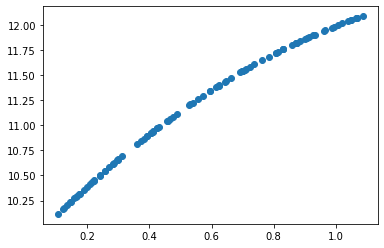

In [ ]:
plt.scatter(x, y)

In [ ]:
linr = LinearRegression()
linr.fit(X_train, Y_train)
print(linr.intercept_, linr.coef_[0])

[10.0545128] [2.00628202]


In [ ]:
# Our data was in Numpy arrays, but we need to transform them into PyTorch's Tensors
# and then we send them to the chosen device
X_train_tensor = (X_train).float().to(device)
Y_train_tensor = (Y_train).float().to(device)

# Here we can see the difference - notice that .type() is more useful
# since it also tells us WHERE the tensor is (device)
print(type(X_train), type(X_train_tensor), X_train_tensor.type())

<class 'torch.Tensor'> <class 'torch.Tensor'> torch.FloatTensor


In [ ]:
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(a, b)

n_epochs = 1000
losses = []
lr = 1e-1

loss_fn = nn.MSELoss(reduction='mean')
optimizer = optim.SGD([a, b], lr=lr)

for it in range(n_epochs):
  yhat = a + b * X_train_tensor

  loss = loss_fn(Y_train_tensor, yhat)

  loss.backward()
  optimizer.step()
  optimizer.zero_grad()

print(a, b)

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)
tensor([10.0545], requires_grad=True) tensor([2.0063], requires_grad=True)


In [ ]:
class ManualLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        # To make "a" and "b" real parameters of the model, we need to wrap them with nn.Parameter
        self.a = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.b = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.c = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        
    def forward(self, x):
        # Computes the outputs / predictions
        return self.a * x**2 + self.b * x + self.c

In [ ]:
torch.manual_seed(42)

# Now we can create a model and send it at once to the device
model = ManualLinearRegression().to(device)

# We can also inspect its parameters using its state_dict
print(model.state_dict())

lr = 1e-1
n_epochs = 1000

loss_fn = nn.MSELoss(reduction='mean')
optimizer = optim.SGD(model.parameters(), lr=lr)

for epoch in range(n_epochs):
    
    # This sets the model in 'training' mode. We have to use this. 
    model.train()

    # No more manual prediction!
    # yhat = a + b * x_tensor
    yhat = model(X_train_tensor)
    
    loss = loss_fn(Y_train_tensor, yhat)
    loss.backward()    
    optimizer.step()
    optimizer.zero_grad()
    
print(model.state_dict())

OrderedDict([('a', tensor([0.3367])), ('b', tensor([0.1288])), ('c', tensor([0.2345]))])
OrderedDict([('a', tensor([-0.4028])), ('b', tensor([2.4672])), ('c', tensor([9.9597]))])


In [ ]:
class LayerLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        # Instead of our custom parameters, we use a Linear layer with single input and single output
        # this implicitly defines both a (the weight) and b (the intercept)
        self.linear = nn.Linear(1, 1)
                
    def forward(self, x):
        # Now it only takes a call to the layer to make predictions
        return self.linear(x)

In [ ]:
[*LayerLinearRegression().parameters()] 

[Parameter containing:
 tensor([[0.8815]], requires_grad=True), Parameter containing:
 tensor([-0.7336], requires_grad=True)]

In [ ]:
def make_train_step(model, loss_fn, optimizer):
    # Builds function that performs a step in the train loop
    def train_step(x, y):
        # Sets model to TRAIN mode
        model.train()
        # Makes predictions
        yhat = model(x)
        # Computes loss
        loss = loss_fn(y, yhat)
        # Computes gradients
        loss.backward()
        # Updates parameters and zeroes gradients
        optimizer.step()
        optimizer.zero_grad()
        # Returns the loss
        return loss.item()
    
    # Returns the function that will be called inside the train loop
    return train_step

# Creates the train_step function for our model, loss function and optimizer
train_step = make_train_step(model, loss_fn, optimizer)
losses = []

# For each epoch...
for epoch in range(n_epochs):
    # Performs one train step and returns the corresponding loss
    loss = train_step(X_train_tensor, Y_train_tensor)
    losses.append(loss)
    
# Checks model's parameters
print(model.state_dict())

OrderedDict([('a', tensor([9.9658])), ('b', tensor([-12.5397])), ('c', tensor([5.0618]))])


In [ ]:
# for grader use only

# insert grade here  
# part (i): 4, part(ii) 8, part (iii) 8

# G[2] = 
#
# please justify point subtractions

In [ ]:
# total score
max_score = 36
$inal_score = sum(G)*(100/max_score)